In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score

In [38]:
df = pd.read_csv("attrition.csv")

In [58]:
df.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [59]:
dff = df[(df['Attrition']==1)]
len(dff)

237

<AxesSubplot:>

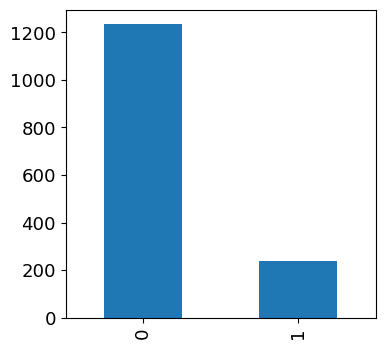

In [60]:
(df['Attrition'].value_counts()).plot(kind='bar',figsize=(4,4),fontsize=13)

In [61]:
(df['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64

In [62]:
df.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,2.721769,2.729932,2.063946,2.728571,6502.931293,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,1.093082,0.711561,1.106940,1.102846,4707.956783,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000
max,60.000000,1.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,29.000000


In [63]:
df.shape

(1470, 20)

In [64]:
x = df.drop(['Attrition'],axis =1)

In [65]:
y = df.Attrition

## One hot encoding for categorical features

In [66]:
x = pd.get_dummies(x, drop_first=False)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .2)

In [69]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size =0.25)

In [70]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()

In [71]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred = model.predict(x_valid)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_valid,y_pred)

0.7585034013605442

In [75]:
# from sklearn import tree

# fig, axes = plt.subplots(figsize =(3,3), dpi =300)

# tree.plot_tree(model, feature_names=list(x), filled = True)
# plt.show()

In [76]:
## Decison Tree wihtout optimal hyper parameter

In [77]:
y_pred = model.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
## accuracy score of decsion tree without any hyperparameter
print('accuracy score of decsion tree without any hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of decsion tree without any hyperparameter = 0.7925170068027211


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       244
           1       0.40      0.42      0.41        50

    accuracy                           0.79       294
   macro avg       0.64      0.64      0.64       294
weighted avg       0.80      0.79      0.79       294



## Finding optimal parameters for decison tree using grid search cv

In [81]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10],
             "min_samples_split":[2,5,10,15,20,25,50],
             "min_samples_leaf": [2,5,10,15,20,25,50,100],
              "criterion" : ["gini","entropy"]
             }

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid = GridSearchCV(model, param_grid= parameters, cv=10, n_jobs= -1)

In [84]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 50]})

In [85]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=50)

In [86]:
grid.best_score_

0.8424412665985699

In [87]:
## Best parameters for the decision tree are as follows:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

## Fitting decison tree with above optimal parameters

In [88]:
model_optimal =  DecisionTreeClassifier(criterion='entropy', max_depth=5,min_samples_leaf =5,min_samples_split = 50)

In [89]:
model_optimal.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=50)

In [90]:
y_pred = model_optimal.predict(x_valid)

In [91]:
accuracy_score(y_valid,y_pred)

0.8741496598639455

In [92]:
## Decison Tree wiht optimal hyper parameter

In [93]:
y_pred = model_optimal.predict(x_test)

In [94]:
## accuracy score of decsion tree with optimal hyperparameter
print('accuracy score of decion tree with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of decion tree with optimal hyperparameter = 0.8503401360544217


In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       244
           1       0.65      0.26      0.37        50

    accuracy                           0.85       294
   macro avg       0.76      0.62      0.64       294
weighted avg       0.83      0.85      0.82       294



## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier 

In [98]:
modelrf = RandomForestClassifier()

In [99]:
modelrf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred = modelrf.predict(x_valid)

In [101]:
accuracy_score(y_valid,y_pred)

0.8877551020408163

In [102]:
## Random Forest wihtoptimal hyper parameter

In [103]:
y_pred = modelrf.predict(x_test)

In [104]:
## accuracy score of random forest without optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.8571428571428571


In [105]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       244
           1       0.83      0.20      0.32        50

    accuracy                           0.86       294
   macro avg       0.85      0.60      0.62       294
weighted avg       0.85      0.86      0.82       294



## Finding optimal parameters for random forest using grid search cv

In [106]:
parametersrf = {"max_depth":[2,3,4,5,6,7,8,9,10],
             "min_samples_split":[2,5,10,15,20,25,50],
             "min_samples_leaf": [2,5,10,15,20,25,50,100],
              "criterion" : ["gini","entropy"],
              "n_estimators": [100,125,150,175,200,250,300],
                "bootstrap" : ["True","False"],
                "max_samples": [200,300,400,500,600,800]
             }

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
gridrf = RandomizedSearchCV(modelrf, param_distributions= parametersrf, cv=10, n_jobs= -1)

In [114]:
gridrf.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_samples': [200, 300, 400, 500, 600,
                                                        800],
                                        'min_samples_leaf': [2, 5, 10, 15, 20,
                                                             25, 50, 100],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 50],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200, 250, 300]})

In [115]:
gridrf.best_estimator_

RandomForestClassifier(bootstrap='False', max_depth=9, max_samples=600,
                       min_samples_leaf=5)

In [116]:
gridrf.best_score_

0.8469228804902962

In [117]:
## Best parameters for the adaboost are as follows:
gridrf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_samples': 600,
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': 'False'}

## Fitting random forest with the  above optimal hyper parameter

In [118]:
modelrf = RandomForestClassifier(n_estimators=100,min_samples_split = 2,min_samples_leaf = 5,max_samples = 600,max_depth =9,
                                criterion = 'gini',bootstrap = 'False')

In [119]:
modelrf.fit(x_train,y_train)

RandomForestClassifier(bootstrap='False', max_depth=9, max_samples=600,
                       min_samples_leaf=5)

In [120]:
y_pred = modelrf.predict(x_valid)

In [121]:
accuracy_score(y_valid,y_pred)

0.8843537414965986

In [122]:
## Random forest with optimal hyper parameter

In [123]:
y_pred = modelrf.predict(x_test)

In [124]:
## accuracy score of random forest with optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.8537414965986394


In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       244
           1       0.77      0.20      0.32        50

    accuracy                           0.85       294
   macro avg       0.81      0.59      0.62       294
weighted avg       0.84      0.85      0.82       294



## Adaboost

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
modelad = AdaBoostClassifier()

In [128]:
modelad.fit(x_train,y_train)

AdaBoostClassifier()

In [129]:
y_pred = modelad.predict(x_valid)

In [130]:
accuracy_score(y_valid,y_pred)

0.8673469387755102

In [131]:
##  adaboost without hyper parameter

In [132]:
y_pred = modelad.predict(x_test)

In [133]:
## accuracy score of adaboost without optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.8775510204081632


In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       244
           1       0.71      0.48      0.57        50

    accuracy                           0.88       294
   macro avg       0.80      0.72      0.75       294
weighted avg       0.87      0.88      0.87       294



In [140]:
f1_score(y_test, y_pred)

0.5714285714285713

## Finding optimal parameter for the adaboost

In [141]:
parameters = {"n_estimators":[10,50,100,500],
             "learning_rate":[.0001,.001,.01,1],
             "algorithm": ['SAMME','SAMME.R']}

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
grid = GridSearchCV(modelad, param_grid= parameters, cv=10, n_jobs= -1)

In [144]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 1],
                         'n_estimators': [10, 50, 100, 500]})

In [145]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=500)

In [146]:
grid.best_score_

0.859397344228805

In [147]:
## Best parameters for the adaboost are as follows:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}

## Fitting the adaboost on the above optimal hyper parameters

In [149]:
modeladopt = AdaBoostClassifier(algorithm='SAMME',learning_rate= 1,n_estimators= 500)

In [150]:
modeladopt.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=500)

In [151]:
y_pred = modeladopt.predict(x_valid)

In [152]:
accuracy_score(y_valid,y_pred)

0.8639455782312925

In [153]:
## Decison Tree adaboost without hyper parameter

In [154]:
y_pred = modeladopt.predict(x_test)

In [155]:
## accuracy score of adaboost without optimal hyperparameter
print('accuracy score of adaboost with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of adaboost with optimal hyperparameter = 0.8741496598639455


In [156]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       244
           1       0.71      0.44      0.54        50

    accuracy                           0.87       294
   macro avg       0.80      0.70      0.74       294
weighted avg       0.86      0.87      0.86       294



In [158]:
f1_score(y_pred,y_test)

0.5432098765432098

## Conclusion
After applying decision tree, random forest and adaboost classifier best f1 score is given by the adbaoost model.

## Applying SMOTE oversampling to handle the imbalanced data set

In [31]:
#! pip install imblearn

In [52]:
y_train.value_counts()

0    741
1    141
Name: Attrition, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE()

In [56]:
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [57]:
y_train_sm.value_counts()

0    741
1    741
Name: Attrition, dtype: int64

## Decision Tree after SMOTE

In [159]:
from sklearn.tree import DecisionTreeClassifier
model =  DecisionTreeClassifier()

In [160]:
model.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier()

In [161]:
y_pred = model.predict(x_valid)

In [162]:
from sklearn.metrics import accuracy_score

In [163]:
accuracy_score(y_valid,y_pred)

0.935374149659864

In [164]:
# from sklearn import tree

# fig, axes = plt.subplots(figsize =(3,3), dpi =300)

# tree.plot_tree(model, feature_names=list(x), filled = True)
# plt.show()

In [165]:
## Decison Tree wihtout optimal hyper parameter

In [169]:
y_pred = model.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
## accuracy score of decsion tree without any hyperparameter
print('accuracy score of decsion tree without any hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of decsion tree without any hyperparameter = 0.9251700680272109


In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       244
           1       0.77      0.80      0.78        50

    accuracy                           0.93       294
   macro avg       0.86      0.88      0.87       294
weighted avg       0.93      0.93      0.93       294



## Finding optimal parameters for decison tree using grid search cv

In [174]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10],
             "min_samples_split":[2,5,10,15,20,25,50],
             "min_samples_leaf": [2,5,10,15,20,25,50,100],
              "criterion" : ["gini","entropy"]
             }

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
grid = GridSearchCV(model, param_grid= parameters, cv=10, n_jobs= -1)

In [177]:
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25, 50, 100],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 50]})

In [178]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20)

In [179]:
grid.best_score_

0.8700253945220388

In [180]:
## Best parameters for the decision tree are as follows:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 20}

## Fitting decison tree with above optimal parameters

In [181]:
model_optimal =  DecisionTreeClassifier(criterion='gini', max_depth=10,min_samples_leaf =2,min_samples_split = 20)

In [183]:
model_optimal.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20)

In [184]:
y_pred = model_optimal.predict(x_valid)

In [185]:
accuracy_score(y_valid,y_pred)

0.8843537414965986

In [186]:
## Decison Tree wiht optimal hyper parameter

In [187]:
y_pred = model_optimal.predict(x_test)

In [188]:
## accuracy score of decsion tree with optimal hyperparameter
print('accuracy score of decion tree with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of decion tree with optimal hyperparameter = 0.8741496598639455


In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       244
           1       0.63      0.64      0.63        50

    accuracy                           0.87       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.88      0.87      0.87       294



In [190]:
y_test.value_counts()

0    244
1     50
Name: Attrition, dtype: int64

## Random Forest after SMOTE

In [191]:
from sklearn.ensemble import RandomForestClassifier 

In [192]:
modelrf = RandomForestClassifier()

In [193]:
modelrf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [194]:
y_pred = modelrf.predict(x_valid)

In [195]:
accuracy_score(y_valid,y_pred)

0.9625850340136054

In [196]:
## Random Forest wihtoptimal hyper parameter

In [197]:
y_pred = modelrf.predict(x_test)

In [198]:
## accuracy score of random forest without optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.9523809523809523


In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       244
           1       0.93      0.78      0.85        50

    accuracy                           0.95       294
   macro avg       0.94      0.88      0.91       294
weighted avg       0.95      0.95      0.95       294



## Finding optimal parameters for random forest using grid search cv

In [200]:
parametersrf = {"max_depth":[2,3,4,5,6,7,8,9,10],
             "min_samples_split":[2,5,10,15,20,25,50],
             "min_samples_leaf": [2,5,10,15,20,25,50,100],
              "criterion" : ["gini","entropy"],
              "n_estimators": [100,125,150,175,200,250,300],
                "bootstrap" : ["True","False"],
                "max_samples": [200,300,400,500,600,800]
             }

In [201]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
gridrf = RandomizedSearchCV(modelrf, param_distributions= parametersrf, cv=10, n_jobs= -1)

In [235]:
gridrf.fit(x_train_sm,y_train_sm)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_samples': [200, 300, 400, 500, 600,
                                                        800],
                                        'min_samples_leaf': [2, 5, 10, 15, 20,
                                                             25, 50, 100],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 50],
                                        'n_estimators': [100, 125, 150, 175,
                                                         200, 250, 300]})

In [236]:
gridrf.best_estimator_

RandomForestClassifier(bootstrap='False', max_depth=6, max_samples=600,
                       min_samples_leaf=5, min_samples_split=25,
                       n_estimators=300)

In [237]:
gridrf.best_score_

0.8963223290404498

In [238]:
## Best parameters for the adaboost are as follows:
gridrf.best_params_

{'n_estimators': 300,
 'min_samples_split': 25,
 'min_samples_leaf': 5,
 'max_samples': 600,
 'max_depth': 6,
 'criterion': 'gini',
 'bootstrap': 'False'}

## Fitting random forest with the  above optimal hyper parameter

In [239]:
modelrf = RandomForestClassifier(n_estimators=300,min_samples_split = 25,min_samples_leaf = 5,max_samples = 600,max_depth =6,
                                criterion = 'gini',bootstrap = 'True')

In [240]:
modelrf.fit(x_train_sm,y_train_sm)

RandomForestClassifier(bootstrap='True', max_depth=6, max_samples=600,
                       min_samples_leaf=5, min_samples_split=25,
                       n_estimators=300)

In [241]:
y_pred = modelrf.predict(x_valid)

In [242]:
accuracy_score(y_valid,y_pred)

0.8945578231292517

In [243]:
## Random forest with optimal hyper parameter

In [244]:
y_pred = modelrf.predict(x_test)

In [245]:
## accuracy score of random forest with optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.8639455782312925


In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       244
           1       0.65      0.44      0.52        50

    accuracy                           0.86       294
   macro avg       0.77      0.70      0.72       294
weighted avg       0.85      0.86      0.85       294



## Adaboost after smote

## Adaboost

In [248]:
from sklearn.ensemble import AdaBoostClassifier

In [249]:
modelad = AdaBoostClassifier()

In [250]:
modelad.fit(x_train_sm,y_train_sm)

AdaBoostClassifier()

In [251]:
y_pred = modelad.predict(x_valid)

In [252]:
accuracy_score(y_valid,y_pred)

0.8503401360544217

In [253]:
##  adaboost without hyper parameter

In [254]:
y_pred = modelad.predict(x_test)

In [255]:
## accuracy score of adaboost without optimal hyperparameter
print('accuracy score of random forest with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of random forest with optimal hyperparameter = 0.8333333333333334


In [256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       244
           1       0.51      0.54      0.52        50

    accuracy                           0.83       294
   macro avg       0.71      0.72      0.71       294
weighted avg       0.84      0.83      0.84       294



In [257]:
f1_score(y_test, y_pred)

0.5242718446601942

## Finding optimal parameter for the adaboost

In [261]:
parameters = {"n_estimators":[10,50,100,500],
             "learning_rate":[.0001,.001,.01,1],
             "algorithm": ['SAMME','SAMME.R']}

In [262]:
from sklearn.model_selection import GridSearchCV

In [263]:
grid = GridSearchCV(modelad, param_grid= parameters, cv=10, n_jobs= -1)

In [264]:
grid.fit(x_train_sm,y_train_sm)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 1],
                         'n_estimators': [10, 50, 100, 500]})

In [265]:
grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=500)

In [266]:
grid.best_score_

0.8963722111373118

In [267]:
## Best parameters for the adaboost are as follows:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500}

## Fitting the adaboost on the above optimal hyper parameters

In [269]:
modeladopt = AdaBoostClassifier(algorithm='SAMME',learning_rate= 1,n_estimators= 500)

In [270]:
modeladopt.fit(x_train_sm,y_train_sm)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=500)

In [271]:
y_pred = modeladopt.predict(x_valid)

In [272]:
accuracy_score(y_valid,y_pred)

0.8775510204081632

In [273]:
## Decison Tree adaboost without hyper parameter

In [274]:
y_pred = modeladopt.predict(x_test)

In [275]:
## accuracy score of adaboost without optimal hyperparameter
print('accuracy score of adaboost with optimal hyperparameter =',accuracy_score(y_test,y_pred))

accuracy score of adaboost with optimal hyperparameter = 0.8639455782312925


In [276]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       244
           1       0.62      0.52      0.57        50

    accuracy                           0.86       294
   macro avg       0.76      0.73      0.74       294
weighted avg       0.86      0.86      0.86       294



In [277]:
f1_score(y_pred,y_test)

0.5652173913043478